In [1]:
import pandas as pd
import numpy as np
import random
import sys
sys.path.append('../..')
from modules.many_features import utils, constants
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_sankey(test_df = pd.read_csv('../../final/test_dfs/dqn_test_df_basic_5000000.csv')
test_df.head()df, title, save, filename): #shows true and false positives 
    pos_df = df[df.y_actual == df.y_pred]
    neg_df = df[df.y_actual != df.y_pred]
    utils.draw_sankey_diagram(pos_df, neg_df, title, save, filename)

#### Test df

In [11]:
test_df = pd.read_csv('../../final/test_dfs/dqn_test_df_basic_5000000.csv')
test_df.head()

,episode_length,index,is_success,reward,terminated,trajectory,y_actual,y_pred
0,5.0,0.0,1.0,1.0,0.0,"['gender', 'hematocrit', 'mcv', 'ret_count', '...",5.0,5.0
1,5.0,1.0,1.0,1.0,0.0,"['gender', 'hematocrit', 'mcv', 'segmented_neu...",1.0,1.0
2,6.0,2.0,1.0,1.0,0.0,"['gender', 'hematocrit', 'mcv', 'ferritin', 't...",4.0,4.0
3,3.0,3.0,1.0,1.0,0.0,"['gender', 'hematocrit', 'No anemia']",0.0,0.0
4,5.0,4.0,1.0,-1.0,1.0,"['gender', 'hematocrit', 'mcv', 'segmented_neu...",7.0,7.0


In [12]:
test_df_sans_inconc = test_df[~((test_df.y_actual == 7.0) | (test_df.y_pred ==7.0))]

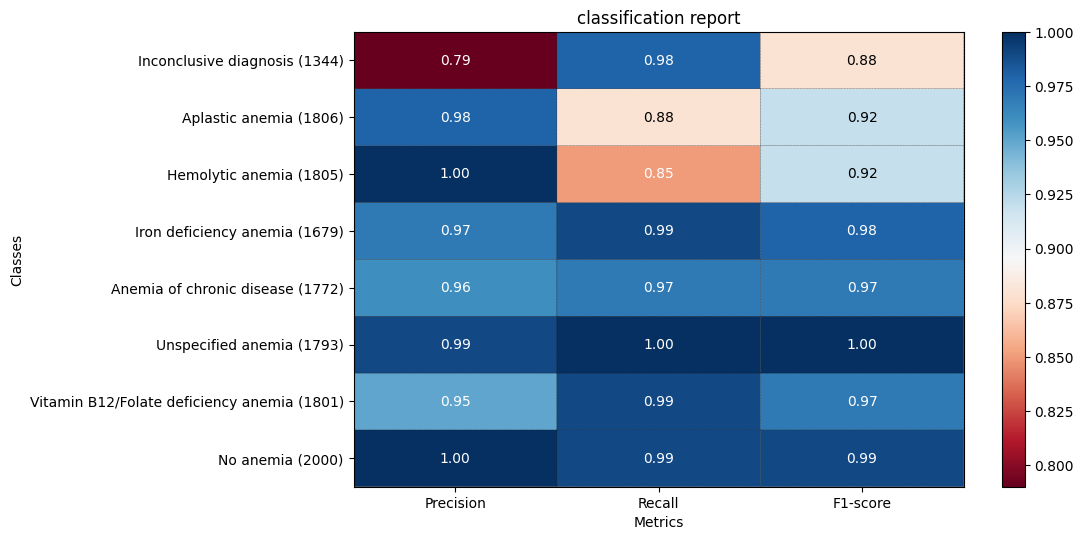

In [13]:
utils.plot_classification_report(test_df['y_actual'], test_df['y_pred'])

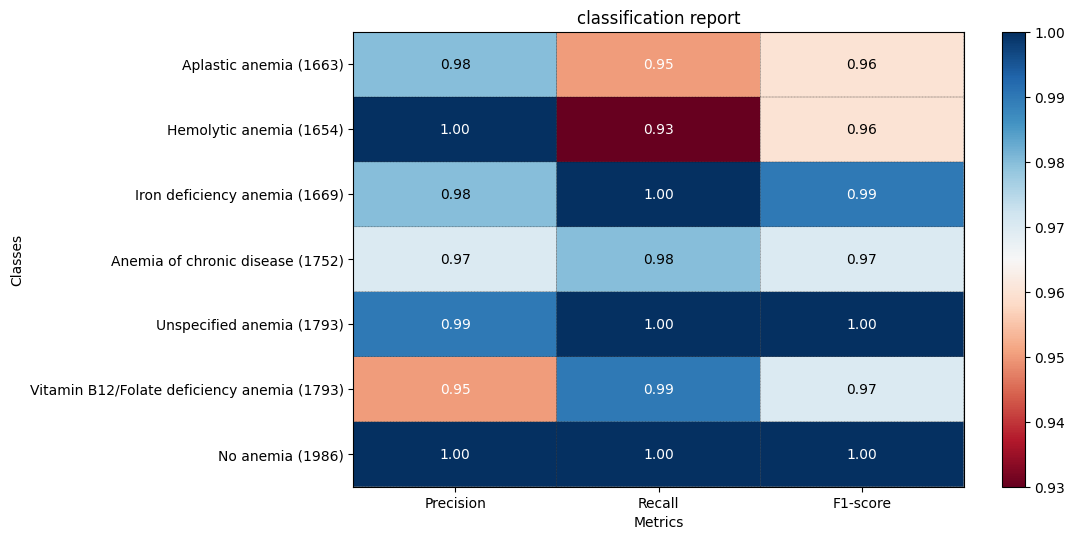

In [14]:
utils.plot_classification_report(test_df_sans_inconc['y_actual'], test_df_sans_inconc['y_pred'])

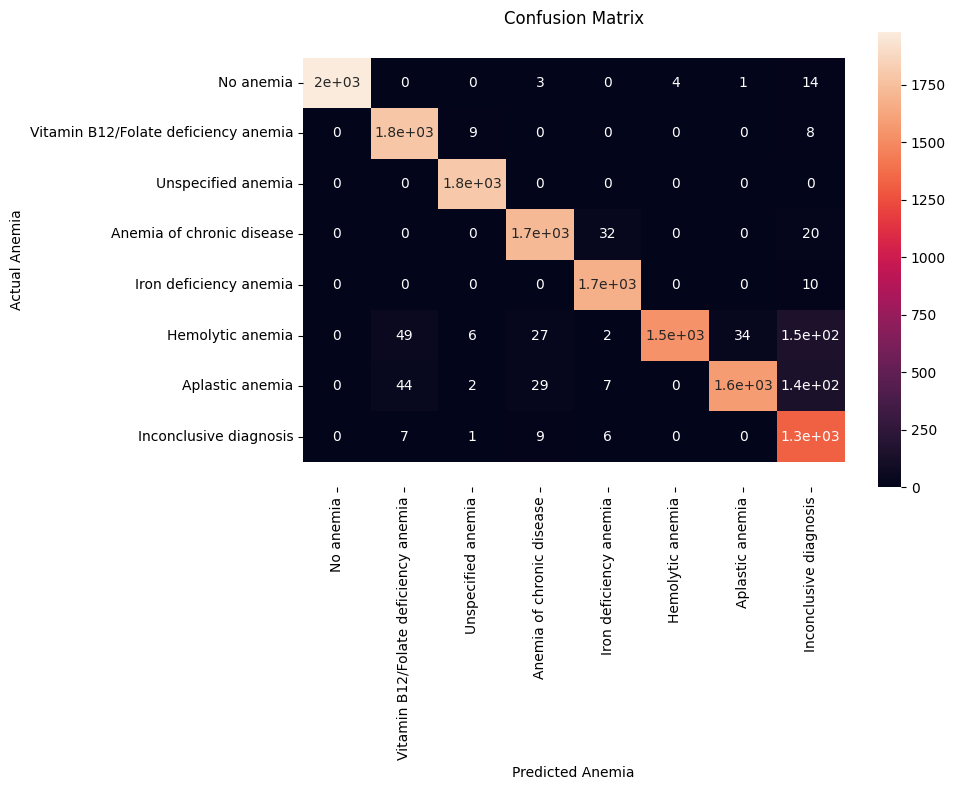

In [15]:
utils.plot_confusion_matrix(test_df['y_actual'], test_df['y_pred'])

In [16]:
def plot_confusion_matrix(y_actual, y_pred, save=False, filename=False):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(y_actual, y_pred)
    classes = ['No anemia', 'Vitamin B12/Folate deficiency anemia', 'Unspecified anemia', 'Anemia of chronic disease', 
               'Iron deficiency anemia', 'Hemolytic anemia', 'Aplastic anemia']
    cm_df = pd.DataFrame(cm, index = classes, columns = classes)
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(cm_df, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Anemia')
    plt.xlabel('Predicted Anemia')
    plt.tight_layout()
    if save:
        plt.savefig(filename)
    plt.show()
    plt.close()

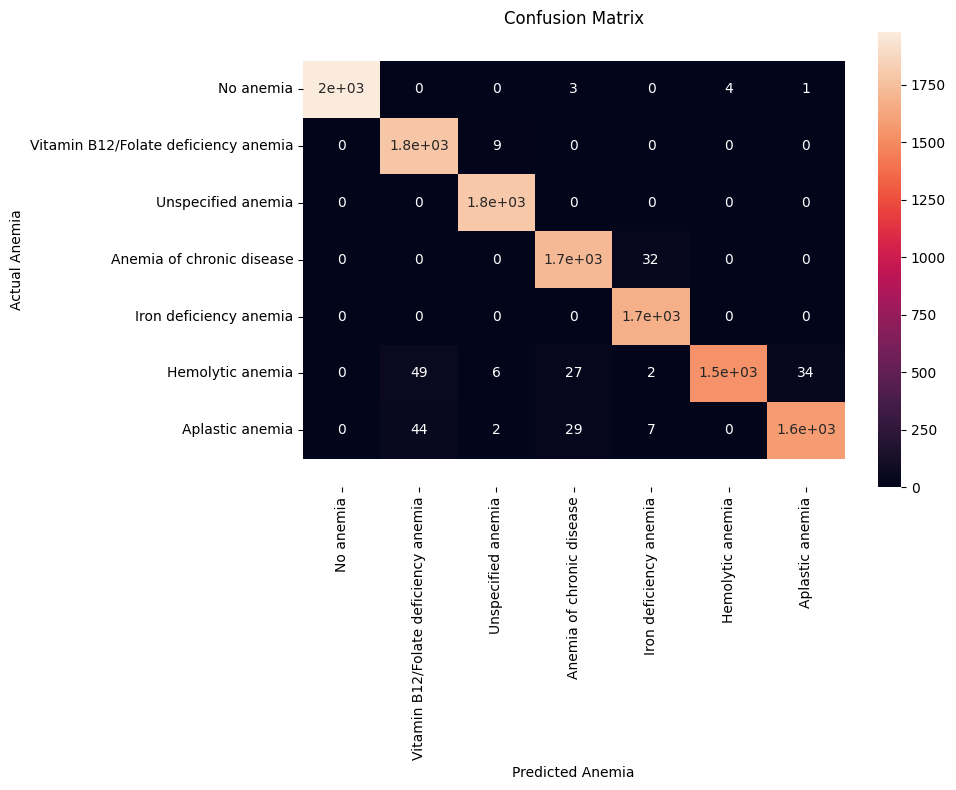

In [17]:
plot_confusion_matrix(test_df_sans_inconc['y_actual'], test_df_sans_inconc['y_pred'])

#### delete from here

#### end here

In [11]:
create_sankey(test_df, 'Overall pathways', True, 
              filename = '../../final/pathways/test_df_mcv_rbc_50_9000000')

#### Success df

In [12]:
success_df = pd.read_csv('../../final/test_dfs/dqn_success_mcv_rbc_50_9000000.csv')
create_sankey(success_df, 'Pathways of successful episodes', save=True, 
              filename='../../final/pathways/success_df_mcv_rbc_50_9000000')

In [13]:
# utils.draw_sankey_diagram(success_df, 'Pathways of successful episodes', save=True, 
#                          filename='../../pathways/many_features/0.1/correlated/tsuccess_df3_noisy6_230000000')

In [14]:
# for i in range(constants.CLASS_NUM):
#     print(utils.anemias[i])
#     anemia_df = test_df[test_df.y_pred==i]
#     if len(anemia_df!=0):
#         utils.draw_sankey_diagram(anemia_df, utils.generate_title(i, len(anemia_df)), save=True, 
#                                   filename=f'../../pathways/many_features/0.1/correlated/{utils.generate_filename(i)}_noisy6_23000000')

In [15]:
#precision - shows true positives and false positives
for i in range(constants.CLASS_NUM):
    print(utils.anemias[i])
    anemia_df = test_df[test_df.y_pred==i]
    if len(anemia_df != 0):
        create_sankey(anemia_df, utils.generate_title(i, len(anemia_df)), save=True, 
              filename=f'../../final/pathways/{utils.generate_filename(i)}_mcv_rbc_50_9000000')

No anemia


Vitamin B12/Folate deficiency anemia
Unspecified anemia


Anemia of chronic disease
Iron deficiency anemia
Hemolytic anemia


Aplastic anemia


Inconclusive diagnosis


In [16]:
# recall - shows true positives and false negatives
for i in range(constants.CLASS_NUM):
    anemia_df = test_df[test_df.y_actual == i]
    if len(anemia_df != 0):
        create_sankey(anemia_df, utils.generate_title(i, len(anemia_df)), save=True, 
              filename=f'../../final/pathways/recall/{utils.generate_filename(i)}_mcv_rbc_50_9000000')
        